# האם באמת העניים בוחרים בימין? האם הבעיה של השמאל היא אחוזי הצבעה נמוכים? ואיזו אוכלוסייה מצביעה לישראל ביתנו?
דרך אחת לנסות להבין את תוצאות הבחירות היא באמצעות חלוקת המצביעים לאשכולות חברתיי-כלכליים. אשכול חברתי-כלכלי הוא דירוג סוציו-אקונומי שמעניק הלמ"ס לאוכלוסייה ביישוב מסויים, מ-1 (הכי נמוך, כולל בעיקר ישובים בדואים וחרדים) ועד 10 (הכי גבוה, כולל ישובים כמו סביון וכפר שמריהו). באמצעות חיבור נתוני ההצבעה בכל יישוב לאשכול אליו היישוב שייך ניתן לנתח את אחוזי ודפוסי ההצבעה בכל אשכול.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

#### עברית יוצאת הפוכה בגרפים אז לשם נוחות נגדיר פונקציה פשוטה שהופכת טקסט 

In [8]:
def rtext(text):
    return text[-1::-1]

## נתוני הצבעה לפי ישובים מתוך האתר של ועדת הבחירות המרכזית

In [9]:
labels = ['s1','name','semel','potential_voters','s2','s3','actual_voters','avoda_meretz','torah_judaism','meshutefet','m4','m5','m6','yamina','m7','m8','m9','m10','m11','m12','m13','m14','israel_beytenu','likud','m15','m16','m17','otzma','m18','kahol_lavan','m19','m20','m21','m22','m23','m24','shas']
df_votes = pd.read_csv('expc.csv', skiprows=1, names=labels, index_col='semel', engine='python')

#הצבעה למפלגה אחרת שאינה מהמפלגות המובילות
df_votes['other'] = df_votes[['m4','m5','m6','m7','m8','m9','m10','m11','m12','m13','m14','m15','m16','m17','m18','m19','m20','m21','m22','m23','m24']].sum(axis=1)
df_votes.drop(['s1','s2','s3','m4','m5','m6','m7','m8','m9','m10','m11','m12','m13','m14','m15','m16','m17','m18','m19','m20','m21','m22','m23','m24'], axis=1, inplace=True)
df_votes.head()

,name,potential_voters,actual_voters,avoda_meretz,torah_judaism,meshutefet,yamina,israel_beytenu,likud,otzma,kahol_lavan,shas,other
semel,,,,,,,,,,,,,
967,אבו גווייעד שבט,2018,589,13,0,554,0,1,4,0,8,2,7
472,אבו גוש,4821,2682,75,4,2157,5,5,280,3,123,14,16
473,אבו סנאן,9422,6037,92,6,4458,16,230,190,3,752,247,43
958,אבו עבדון שבט,142,40,0,0,40,0,0,0,0,0,0,0
968,אבו קורינאת שבט,3037,1328,9,0,1263,1,0,8,1,33,0,13


#### חישוב אחוזי ההצבעה לכל מפלגה בכל קלפי

In [10]:
df_votes['voting_pct'] = df_votes['actual_voters'] / df_votes['potential_voters']
for column in ['avoda_meretz','torah_judaism', 'meshutefet', 'yamina', 'israel_beytenu', 'likud','otzma', 'kahol_lavan', 'shas', 'other']:
    df_votes[column + '_pct'] = round(100*(df_votes[column] / df_votes['actual_voters']))

### HEATMAP
שמראה את הקשרים בין אחוז ההצבעה למפלגות שונות בין קלפיות.
מכיוון שישנן לא מעט קלפיות מגזריות קטנות, למשל בהתנחלויות או בכפרים ערביים, שבהן ישנם בסביבות 100 אחוזי הצבעה למפלגה אחת, נעשה שימוש במתאם קנדל הבוחן קורלציה על סמך דירוג ולא ערכים מוחלטים, וכן נלקחו בחשבון רק קלפיות בהן היו למעלה מ-500 מצביעים.
מטרת התרשים איננה לספק ניתוח מדויק אלא לאפשר התרשמות.

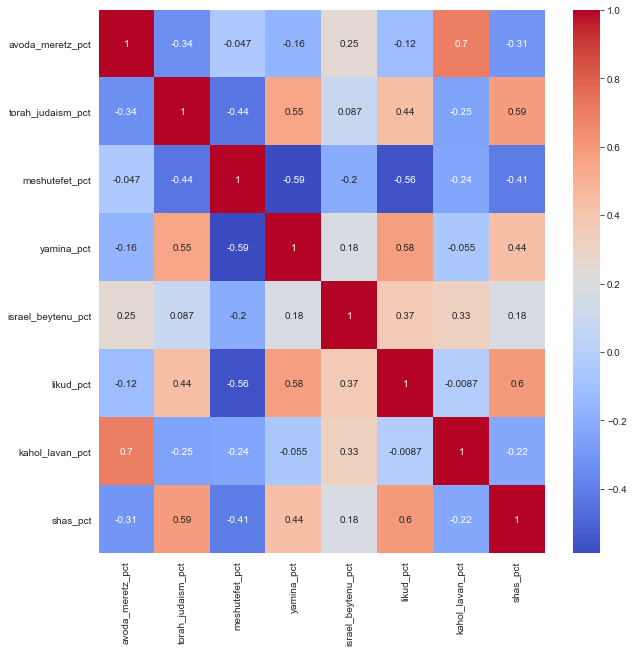

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_votes.loc[df_votes['actual_voters']>500,['avoda_meretz_pct', 'torah_judaism_pct', 'meshutefet_pct', 'yamina_pct',
       'israel_beytenu_pct', 'likud_pct', 'kahol_lavan_pct',
       'shas_pct']].corr(method='kendall'),annot=True,cmap='coolwarm')

#### מה שיפה בתרשים הנ"ל הוא שגם אם לא היינו יודעים כלום על הפוליטיקה הישראלית, יכולנו להבין ממנו מה הם הגושים שמרכיבים את הכנסת. ניכר כי הליכוד, ימינה והמפלגות החרדיות מרכיבות קבוצה אחת, כחול-לבן והעבודה-מרצ-גשר מרכיבות קבוצה שנייה, ישראל ביתנו נמצאת על התפר ויכולה ללכת לכל כיוון, ואילו הרשימה המשותפת היא קבוצה נפרדת משל עצמה, לא שייכת ממש לאף גוש אבל קרובה יותר לגוש השמאל. 

### אחוז הצבעה כללי ולפי ישובים

In [12]:
print('אחוז ההצבעה הכללי הוא: ',np.round(100*df_votes['actual_voters'].sum() / df_votes['potential_voters'].sum(),2))

אחוז ההצבעה הכללי הוא:  66.05


### אחוז ההצבעה הזה מחייב הסבר:
על פי נתוני ועדת הבחירות המרכזית לכנסת ה-22, אחוז ההצבעה היה 71.5. מדוע אחוז זה שונה ממה שקיבלנו?
מקור ההבדל הוא במעטפות הכפולות. בקובץ של ועדת הבחירות המרכזית המעטפות הכפולות נספרות במספר המצביעים בפועל (ומוסיפות כ-328 אלף קולות) אך אינן נספרות במניין המצביעים הפוטנציאלים.
מכיוון שהניתוח שלנו הוא לפי ישובים ואשכולות, המעטפות הכפולות אינן חלק ממנו. בקרב מצביעים שניתן לשייכים לישובים, אחוז ההצבעה הוא 66.

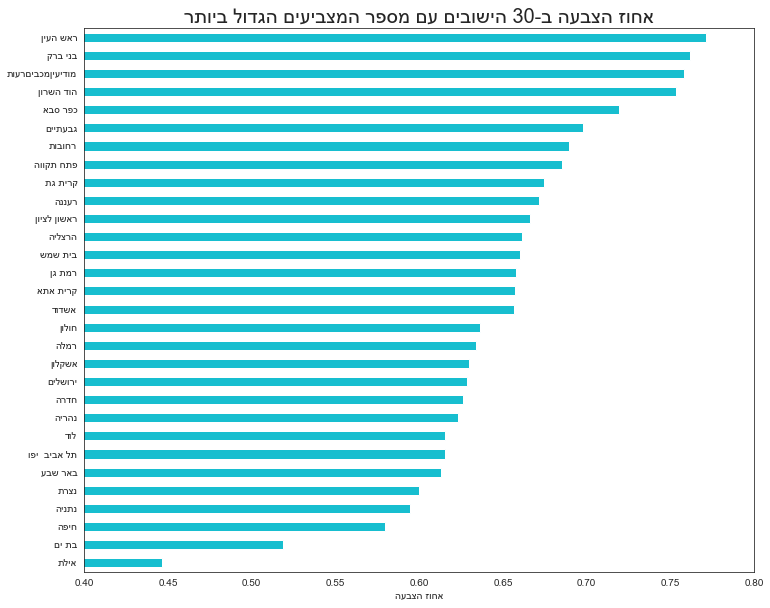

In [13]:
df_big_cities = df_votes.loc[df_votes['potential_voters'].sort_values(ascending=False).head(30).index,:]
df_big_cities['name'] = df_big_cities['name'].apply(rtext)
df_big_cities.set_index('name',inplace=True)

p1 = df_big_cities['voting_pct'].sort_values().plot(kind='barh',figsize=(12,10),color='tab:cyan')
plt.xlim(0.4,0.8)
plt.title(rtext('אחוז הצבעה ב-03 הישובים עם מספר המצביעים הגדול ביותר'),size=20)
plt.ylabel(rtext(''))
plt.xlabel(rtext('אחוז הצבעה'))
plt.show()

## דירוג סוציו-אקונומי של יישובים מתוך הלמ"ס

In [14]:
df_eshkol = pd.read_excel('t01.xlsx', usecols = [1,2,3,4,5,6], header=None, skiprows=10)
df_eshkol.columns = ['semel','cityname','population','madad','madad_group','eshkol']
df_eshkol.set_index('semel',inplace=True)
df_eshkol.head()

,cityname,population,madad,madad_group,eshkol
semel,,,,,
472,אבו גוש,"6,894.605",-0.762,69.000,3.000
473,אבו סנאן,"13,357.670",-0.753,71.000,3.000
182,אבן יהודה,"13,125.224",1.535,244.000,8.000
2710,אום אל-פחם,"52,499.688",-1.327,18.000,2.000
31,אופקים,"25,613.702",-0.698,76.000,3.000


In [15]:
df = df_votes.join(df_eshkol)
df = df[df['eshkol'].notna()]
df.head()

,name,potential_voters,actual_voters,avoda_meretz,torah_judaism,meshutefet,yamina,israel_beytenu,likud,otzma,...,likud_pct,otzma_pct,kahol_lavan_pct,shas_pct,other_pct,cityname,population,madad,madad_group,eshkol
semel,,,,,,,,,,,,,,,,,,,,,
26,ראש פינה,2405,1664,258,22,28,83,49,456,10,...,27.000,1.000,43.000,2.000,1.000,ראש פינה,"2,908.349",0.825,199.000,7.000
28,מזכרת בתיה,10540,8079,659,40,14,534,257,2646,20,...,33.000,0.000,46.000,2.000,0.000,מזכרת בתיה,"12,698.300",1.251,224.000,8.000
29,יסוד המעלה,1252,889,92,3,1,61,21,218,0,...,25.000,0.000,54.000,1.000,0.000,יסוד המעלה,"1,644.449",1.148,215.000,8.000
31,אופקים,21810,14546,243,2198,18,572,1118,5881,90,...,40.000,1.000,7.000,23.000,0.000,אופקים,"25,613.702",-0.698,76.000,3.000
41,אליכין,2579,1956,73,41,1,83,29,1071,13,...,55.000,1.000,19.000,14.000,0.000,אליכין,"3,424.354",0.379,160.000,6.000


### כמה מצביעים יש בכל אשכול?

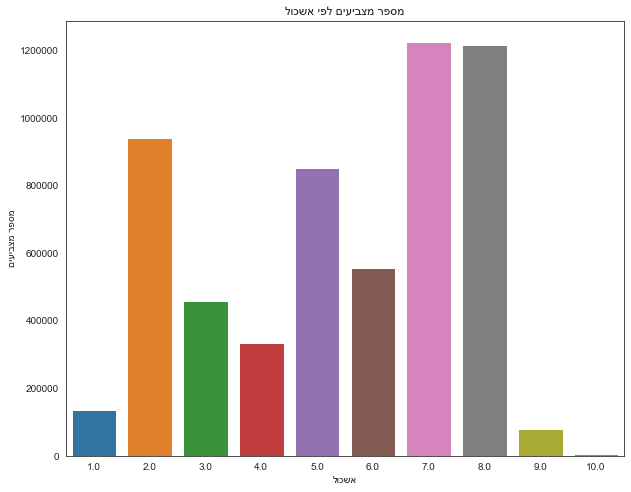

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='eshkol',y='potential_voters',estimator=sum,ci=False)
plt.title(rtext('מספר מצביעים לפי אשכול'))
plt.xlabel(rtext('אשכול'))
plt.ylabel(rtext('מספר מצביעים'))
plt.show()

### האשכולות אינם שווים בגודלם. 
אשכולות 7-8, מעמד הביניים, הם הגדולים ביותר. אשכול 10 קטן מאד וכולל מעט ישובים יוקרתיים כגון ארסוף. 

## יצירת דאטה של אחוזי ההצבעה למפלגות השונות ובאופן כללי לפי אשכול 

In [17]:
clusters = df.groupby('eshkol')
df_eshkolot = pd.DataFrame(round(100*(clusters['actual_voters'].sum() / clusters['potential_voters'].sum())),columns=['voting_pct'])

for column in ['avoda_meretz','torah_judaism', 'meshutefet', 'yamina', 'israel_beytenu', 'likud','otzma', 'kahol_lavan', 'shas', 'other']:
    df_eshkolot[column + '_pct'] = round(100*(clusters[column].sum() / clusters['actual_voters'].sum()))

df_eshkolot.index = np.round(df_eshkolot.index).astype('int64')
df_eshkolot.index.name = 'eshkol'

df_eshkolot

,voting_pct,avoda_meretz_pct,torah_judaism_pct,meshutefet_pct,yamina_pct,israel_beytenu_pct,likud_pct,otzma_pct,kahol_lavan_pct,shas_pct,other_pct
eshkol,,,,,,,,,,,
1,69.000,1.000,35.000,49.000,0.000,0.000,2.000,0.000,1.000,11.000,0.000
2,67.000,3.000,23.000,30.000,4.000,2.000,16.000,0.000,7.000,15.000,0.000
3,66.000,2.000,2.000,61.000,3.000,4.000,15.000,0.000,6.000,6.000,0.000
4,63.000,2.000,4.000,23.000,2.000,8.000,36.000,0.000,15.000,10.000,0.000
5,61.000,3.000,4.000,3.000,4.000,14.000,44.000,0.000,16.000,10.000,0.000
6,61.000,3.000,2.000,1.000,6.000,10.000,46.000,0.000,22.000,9.000,0.000
7,66.000,5.000,2.000,2.000,5.000,8.000,37.000,0.000,33.000,6.000,0.000
8,68.000,11.000,1.000,2.000,4.000,3.000,26.000,0.000,49.000,4.000,0.000
9,74.000,11.000,1.000,1.000,5.000,3.000,22.000,0.000,56.000,2.000,0.000


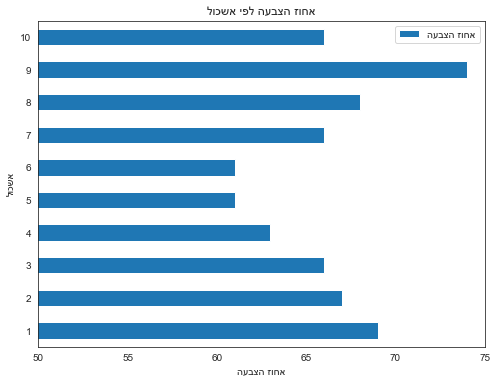

In [18]:
df_eshkolot.reset_index().plot(kind='barh', x='eshkol', y='voting_pct', figsize=(8,6), label=rtext('אחוז הצבעה'))
plt.xlim(50,75)
plt.title(rtext('אחוז הצבעה לפי אשכול'))
plt.ylabel(rtext('אשכול'))
plt.xlabel(rtext('אחוז הצבעה'))
plt.show()

### ניתן לראות כי אחוזי ההצבעה אינם זהים בין האשכולות.
באשכולות התחתונים והעליונים אחוזי הצבעה גבוהים שרובים מעל הממוצע הכללי של 65%. באשכולות הביניים 3-6 אחוזי הצבעה נמוכים יחסית, קרובים יותר ל-60%.

In [19]:
df_eshkolot_heb = df_eshkolot[['voting_pct','kahol_lavan_pct', 'avoda_meretz_pct', 'meshutefet_pct', 'israel_beytenu_pct', 'likud_pct', 'yamina_pct', 'shas_pct', 'torah_judaism_pct']]
heb_names = ['העבצה זוחא','ןבל לוחכ','רשג-צרמ-הדובע','תפתושמה','ונתיב לארשי','דוכילה','הנימי','ס"ש','הרותה תודהי']
df_eshkolot_heb.columns = heb_names
df_eshkolot_heb.index.name = 'לוכשא'
df_eshkolot_heb

,העבצה זוחא,ןבל לוחכ,רשג-צרמ-הדובע,תפתושמה,ונתיב לארשי,דוכילה,הנימי,"ס""ש",הרותה תודהי
לוכשא,,,,,,,,,
1,69.000,1.000,1.000,49.000,0.000,2.000,0.000,11.000,35.000
2,67.000,7.000,3.000,30.000,2.000,16.000,4.000,15.000,23.000
3,66.000,6.000,2.000,61.000,4.000,15.000,3.000,6.000,2.000
4,63.000,15.000,2.000,23.000,8.000,36.000,2.000,10.000,4.000
5,61.000,16.000,3.000,3.000,14.000,44.000,4.000,10.000,4.000
6,61.000,22.000,3.000,1.000,10.000,46.000,6.000,9.000,2.000
7,66.000,33.000,5.000,2.000,8.000,37.000,5.000,6.000,2.000
8,68.000,49.000,11.000,2.000,3.000,26.000,4.000,4.000,1.000
9,74.000,56.000,11.000,1.000,3.000,22.000,5.000,2.000,1.000


## בחינת דפוסי ההצבעה בכל אשכול

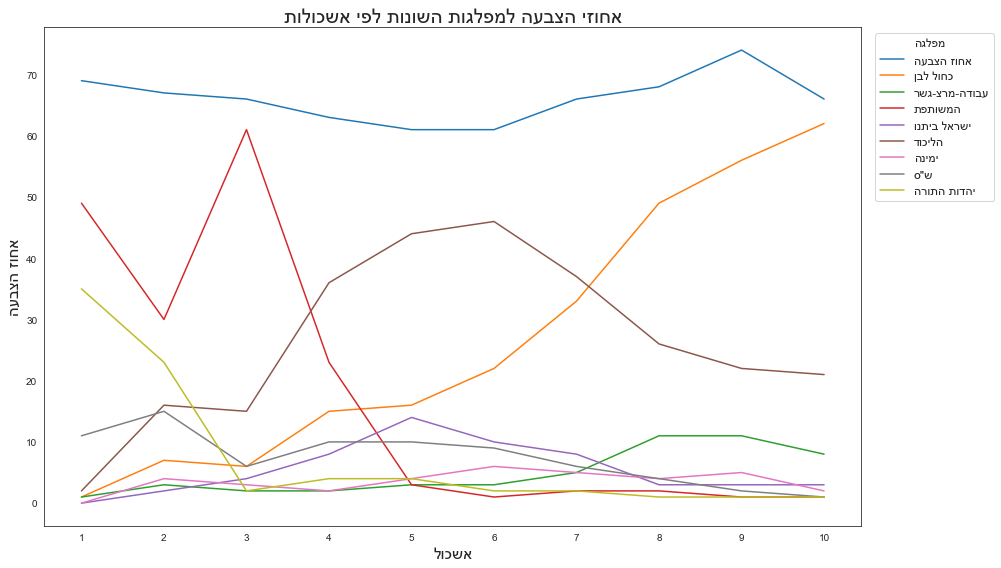

In [20]:
df_for_graph = df_eshkolot_heb.reset_index().melt(id_vars='לוכשא',var_name='הגלפמ')

plt.figure(figsize=(14,8))

g = sns.lineplot(data=df_for_graph,x='לוכשא', y='value',hue='הגלפמ')
g.set(xticks=[1,2,3,4,5,6,7,8,9,10])
g.set_title(rtext('אחוזי הצבעה למפלגות השונות לפי אשכולות'),size=20)
g.set_ylabel(rtext('אחוז הצבעה'),size=16)
g.set_xlabel(rtext('אשכול'),size=16)
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize='larger')
plt.tight_layout()
plt.show()

## מה אפשר ללמוד מהגרף, למשל?
קודם כל, שישראל מתחלקת לישראל ראשונה, שנייה ושלישית. ישראל הראשונה, אשכולות 8-10, מצביעה לכחול לבן ולעבודה-מרצ. ישראל השנייה, אשכולות 4-6 (אשכול 7 הוא ישראל 1.5), היא מעוז הליכוד. ישראל השלישית, אשכולות 1-3, מורכבת בחלקה הגדול מערבים וחרדים, ובהתאם מצביעה לרשימה המשותפת, ליהדות התורה ולש"ס.

מה לגבי אחוזי הצבעה? בניגוד לדעה הרווחת, ישראל של השמאל דווקא נוהרת לקלפיות. האשכולות העליונים מצביעים בשיעור הגבוה ביותר. מסורתית, ישראל השלישית נוהרת הרבה פחות, אבל בבחירות האחרונות כידוע הציבור הערבי הצביע גם הצביע, מה שניתן לראות גם בגרף וגם במספר המנדטים של הרשימה המשותפת. וישראל השנייה? היא עדיין מצביעה בשיעור הנמוך ביותר. אילו הליכוד היה מצליח להוציא את קהל היעד שלו מהבית כמו שהמתחרים מצליחים, אולי היה ביכולתו להקים ממשלה. במקרה של בחירות נוספות, מוטב לליכוד לאמץ אסטרטגיה שתתמקד בדרבון הקהל הזה לצאת להצביע.

ומי מצביע לליברמן? בגדול, ישראל השנייה. כנראה שיש ישראל שנייה-שנייה, שמורכבת פחות מפריפריה מסורתית ויותר מציבור רוסי מבוגר. אבל זו כבר מסקנה שחורגת מהניתוח הנוכחי.

## בחינת הרכב המצביעים עבור כל מפלגה

In [21]:
df_new = df[['eshkol','kahol_lavan', 'avoda_meretz', 'meshutefet', 'israel_beytenu', 'likud', 'yamina', 'shas', 'torah_judaism']].groupby('eshkol').sum()
heb_names = ['ןבל לוחכ','רשג-צרמ-הדובע','תפתושמה','ונתיב לארשי','דוכילה','הנימי','ס"ש','הרותה תודהי']
df_new.columns = heb_names
df_new = df_new/df_new.sum()
df_new = df_new.T
df_new.columns = ['1','2','3','4','5','6','7','8','9','10']
df_new

,1,2,3,4,5,6,7,8,9,10
ןבל לוחכ,0.001,0.043,0.019,0.032,0.090,0.079,0.282,0.417,0.034,0.003
רשג-צרמ-הדובע,0.006,0.086,0.034,0.024,0.073,0.054,0.219,0.470,0.032,0.002
תפתושמה,0.089,0.363,0.353,0.091,0.035,0.007,0.034,0.027,0.001,0.000
ונתיב לארשי,0.000,0.039,0.048,0.072,0.308,0.136,0.270,0.119,0.006,0.001
דוכילה,0.001,0.087,0.040,0.066,0.204,0.139,0.264,0.186,0.012,0.001
הנימי,0.002,0.174,0.055,0.030,0.127,0.123,0.246,0.227,0.017,0.001
"ס""ש",0.034,0.306,0.062,0.065,0.171,0.099,0.164,0.095,0.004,0.000
הרותה תודהי,0.129,0.578,0.027,0.034,0.088,0.028,0.079,0.034,0.002,0.000


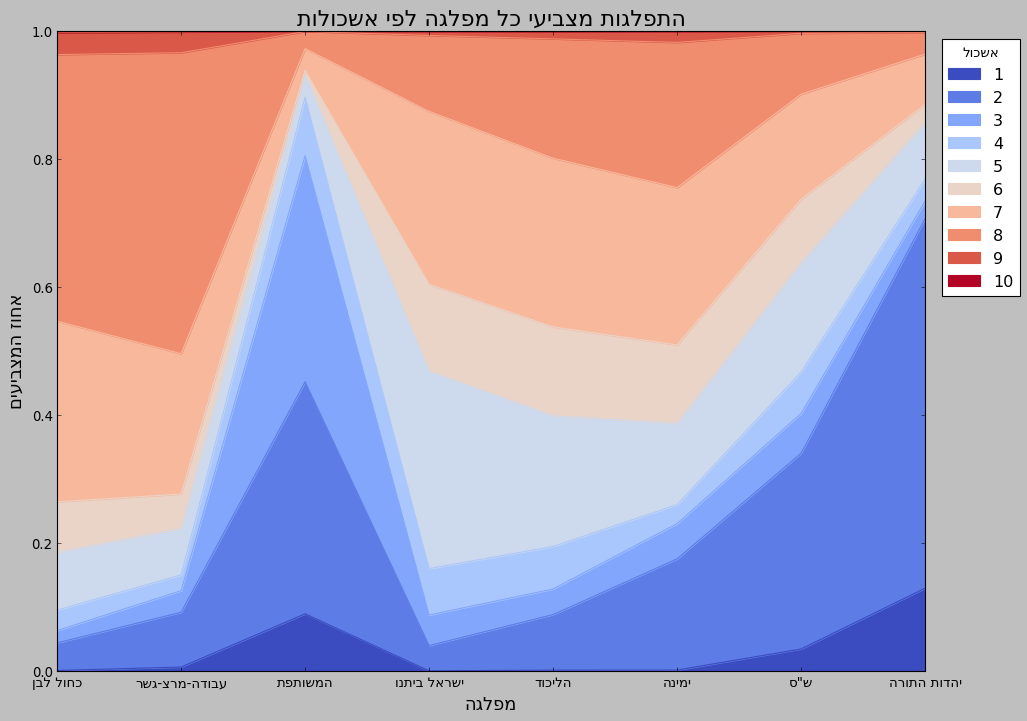

In [22]:
plt.style.use('_classic_test')
g = df_new.plot(kind='area',figsize=(14,10),cmap='coolwarm')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize='larger', title='לוכשא')
g.set_title(rtext('התפלגות מצביעי כל מפלגה לפי אשכולות'),size=20)
g.set_ylabel(rtext('אחוז המצביעים'),size=16)
g.set_xlabel(rtext('מפלגה'),size=16)
plt.show()

### תרשים זה משלים את התמונה שראינו קודם.
ניתן לראות כי המפלגות החרדיות והרשימה המשותפת מתבססות על מצביעים המתגוררים בערים השייכות לאשכולות הנמוכים.
מפלגות הימין מתבססות על מצביעים השייכים לאשכולות הביניים.
מפלגות השמאל מתבססות על האשכולות העליונים.
המפלגות המגזריות ימשיכו לזכות בקולות של קהלי היעד שלהן. מפלגות הימין צריכות להתמקד בשיפור תדמיתן באשכולות העליונים ובהעלאת אחוזי ההצבעה באשכולות הביניים. מפלגות השמאל צריכות למצוא דרך להגיע לאשכולות הביניים.